DATA ANALYSIS AND VISUALIZATION

The Data is been scrapped from Flipkart website comprising of different laptops. Each page contains around details of 24 laptops.We try to extract the different features of the laptops such as the description of the laptop (model name along with the specification of the laptop), Name of the Processor, Type of Processor, RAM, Operating System, Disk Drive Storage, Display, Warranty, Ratings, and Price. And we extracted the data from around 30 pages so our dataset consists of information the 709 distinct laptops.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d=pd.read_csv("C:\\Users\\HP\\Desktop\\Assignment\\laptops1.csv",sep=None,thousands=',',engine='python')

In [3]:
d

,Model,Price,Rating,Display,Warranty,graphic_card,Company,touchscreen,Gen_type,Ram_in_gb,Disk_drive,Processor_Name,processor_type,Operating_System
0,acer Aspire 7 Core i5 9th Gen,49990,4.4,39.62 cm (15.6 inch) Display,1 Year International Travelers Warranty (ITW),Yes,Acer,No,9,8,SSD,Intel,i5,Windows 10
1,HP 15s Ryzen 3 Dual Core 3250U,33990,4.2,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,No,HP,No,Not Mentioned,8,HDD,AMD,Ryzen 3,Windows 10
2,Lenovo Ideapad S145 Ryzen 3 Dual Core 3200U,27990,4.2,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,No,Lenovo,No,Not Mentioned,4,HDD,AMD,Ryzen 3,Windows 10
3,HP 14s Ryzen 3 Quad Core 4300U,36990,4.7,35.56 cm (14 Inches) Display,1 Year Onsite Warranty,No,HP,No,Not Mentioned,8,SSD,AMD,Ryzen 3,Windows 10
4,Lenovo Legion 5 Ryzen 5 Hexa Core 4600H,63990,4.5,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,Yes,Lenovo,No,Not Mentioned,8,SSD,AMD,Ryzen 5,Windows 10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,HP Pavilion Core i5 7th Gen,63500,4.0,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,Yes,HP,No,7,4,HDD,Intel,i5,Windows 10
705,ASUS ROG Strix G15 Ryzen 9 Octa Core,144990,NaN,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,Yes,Asus,No,Not Mentioned,16,SSD,AMD,Not Metioned,Windows 10
706,ASUS ZenBook Duo 14 (2021) Core i7 11th Gen,158990,NaN,35.56 cm (14 inch) Touchscreen Display,1 Year Onsite Warranty,Yes,Asus,Yes,10,16,SSD,Intel,i7,Windows 10
707,DELL Vostro 3405 Ryzen 5 Quad Core 3450U,49999,4.2,35.56 cm (14 inch) Display,1 Year Onsite Warranty,No,Dell,No,Not Mentioned,8,SSD,AMD,Ryzen 5,Windows 10


In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Model             709 non-null    object 
 1   Price             709 non-null    int64  
 2   Rating            484 non-null    float64
 3   Display           709 non-null    object 
 4   Warranty          663 non-null    object 
 5   graphic_card      709 non-null    object 
 6   Company           709 non-null    object 
 7   touchscreen       709 non-null    object 
 8   Gen_type          709 non-null    object 
 9   Ram_in_gb         709 non-null    int64  
 10  Disk_drive        709 non-null    object 
 11  Processor_Name    709 non-null    object 
 12  processor_type    709 non-null    object 
 13  Operating_System  709 non-null    object 
dtypes: float64(1), int64(2), object(11)
memory usage: 77.7+ KB


Inference: We conclude that columns has 2 integer type columns, 12 object types and 1 columns with decimal values. Also, all the columns do not have 709 values which indicates that there are missing values.

Missing Values:

In [5]:
d.isnull().sum()

Model                 0
Price                 0
Rating              225
Display               0
Warranty             46
graphic_card          0
Company               0
touchscreen           0
Gen_type              0
Ram_in_gb             0
Disk_drive            0
Processor_Name        0
processor_type        0
Operating_System      0
dtype: int64

Visualizing the above data in form of heatmap

We consider heatmaps for analysing null values as heatpmaps are effecient to find occurrences of pattern in big chunks.Hence making our tasks more effortless to identify the missing values. 

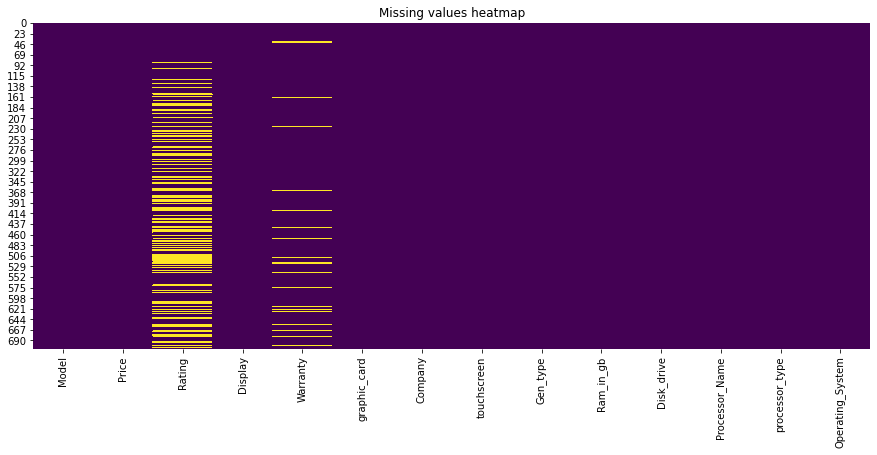

In [6]:
plt.figure(figsize=(15,6))
sns.heatmap(d.isnull(),cmap='viridis',cbar=False).set_title("Missing values heatmap")
plt.show()

Inference: The column 'Rating','Warranty' have got null values. While 'Rating'has huge amount null values, 'Warranty' has moderate amount of null values.But from analysis point rating is important so will not able to drop the 'Rating' column but during analysis of rating column we will handle the missing values by replacing it with mean of all values.

1.Analysis of Price(target) column:

In [7]:
d['Price'].describe()

count       709.000000
mean      73794.959097
std       46140.856709
min       12999.000000
25%       44999.000000
50%       60500.000000
75%       84000.000000
max      299990.000000
Name: Price, dtype: float64

We will consider histogram for analyzing Price column since histogram are suitable to show the distribution of numeric data through continuous interval. 

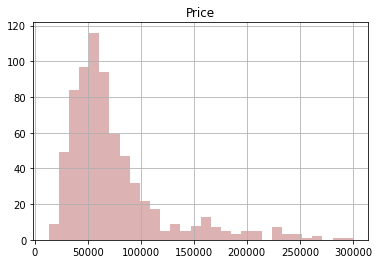

In [8]:
d['Price'].hist(bins=30,color='darkred',alpha=0.3)
plt.title("Price")
plt.show()

Inference:The range of the laptop begins with 12,999 Rs till the most expensive laptop is  2,99,990 Rs and the most of the laptop ranges in between (50,000 to 1,00,000)Rs.

2.Analysis of Rating column :

Handling the Missing values

In [9]:
d['Rating'].replace(np.NaN,d['Rating'].mean(),inplace=True)

In [10]:
d['Rating'].describe()

count    709.000000
mean       4.204959
std        0.363069
min        1.600000
25%        4.100000
50%        4.204959
75%        4.400000
max        5.000000
Name: Rating, dtype: float64

We will consider histogram for analyzing Rating column since histogram are suitable to show the distribution of numeric data through continuous interval.

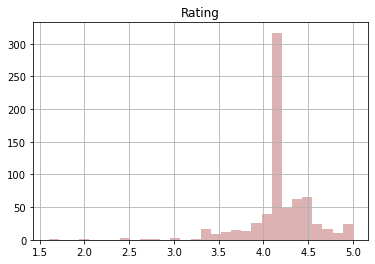

In [11]:
d['Rating'].hist(bins=30,color='darkred',alpha=0.3)
plt.title("Rating")
plt.show()

We will consider barplot to plot rating against price since bar plot are suitable for comparing a few variables in the same category or datasets with similar variables.

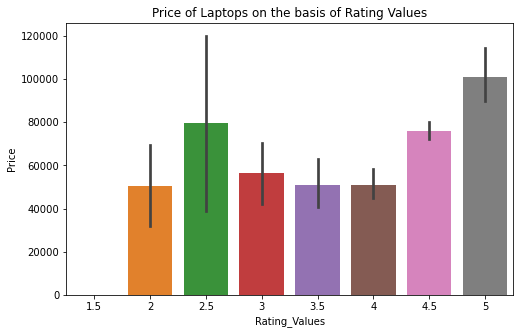

In [12]:
plt.figure(figsize=(8,5))
d['Rating_Values']=pd.cut(d['Rating'],bins=[0,1.5,2,2.5,3,3.5,4,4.5,5],labels=['1.5','2','2.5','3','3.5','4','4.5','5'])
x = sns.barplot(x = d['Rating_Values'],y=d['Price'], data = d)
plt.title("Price of Laptops on the basis of Rating Values")
plt.show()

Inference:This feature contains value ranging from(0.0-5.0).The maximum rating lies in range of 4-4.5 as infered from above histogram.And the laptop with higher prices have higher ratings to some extent can be concluded from above barplot.

3.Analysis of Processors(Processor_Name,Processor_type,Generation) :

To get exact count of different processors in laptop we consider countplot. 

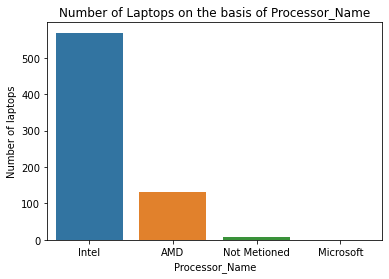

In [13]:
sns.countplot(data=d,x='Processor_Name')
plt.xlabel('Processor_Name') 
plt.ylabel('Number of laptops') 
plt.title("Number of Laptops on the basis of Processor_Name")
plt.show()

Inference: The most of the laptop have Intel Processor followed by AMD Processor as infered from countplot.

In [14]:
grouped = d.groupby(['Processor_Name','processor_type'])
grouped.size()

Processor_Name  processor_type
AMD             APU                 7
                Athlon              7
                Not Metioned        6
                Ryzen 3            28
                Ryzen 5            68
                Ryzen 7            15
Intel           Celeron            13
                Pentium             4
                i3                110
                i5                298
                i7                132
                i9                 11
                m3                  1
Microsoft       SQ1                 1
Not Metioned    Not Metioned        8
dtype: int64

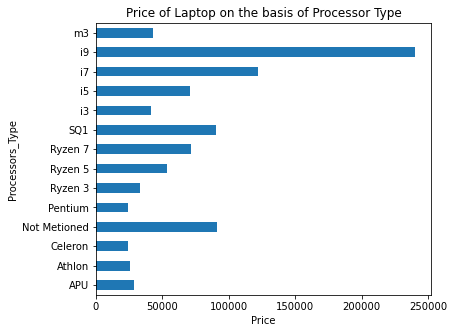

In [15]:
plt.figure(figsize=(6,5))
d.groupby('processor_type')['Price'].mean().plot(kind='barh')
plt.xlabel('Price') 
plt.ylabel('Processors_Type') 
plt.title("Price of Laptop on the basis of Processor Type")
plt.show()

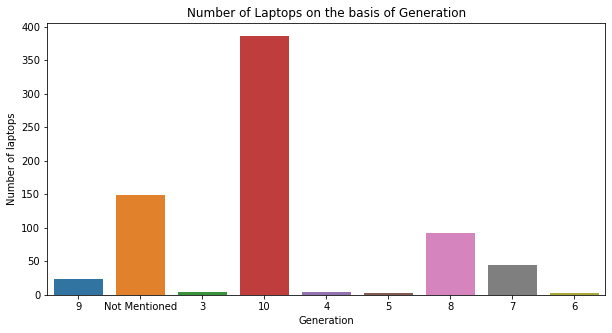

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(data=d,x='Gen_type')
plt.xlabel('Generation') 
plt.ylabel('Number of laptops') 
plt.title("Number of Laptops on the basis of Generation")
plt.show()

Inference : Intel and AMD processors have different type of CPUs and these inturn have different gens. Intel has i3,i5,i7,i9,Pentium CPUs and AMD has Ryzen3,Ryzen5,Ryzen7 CPUs. As we go from i3 to i5 to i7 to i9 the performance,speed,price keeps increasing. Similar is the case with AMD Ryzen versions(Ryzen 7 > Ryzen 5 > Ryzen3) as infered from above bar plot.The most of the laptops have Intel processors ,most of these Intel processors have i5 CPUs and most of the laptop have 10th generation as infered from above analysis.

4.Analysis of Operating System Column :

To get exact count of different operating system  we consider countplot. 

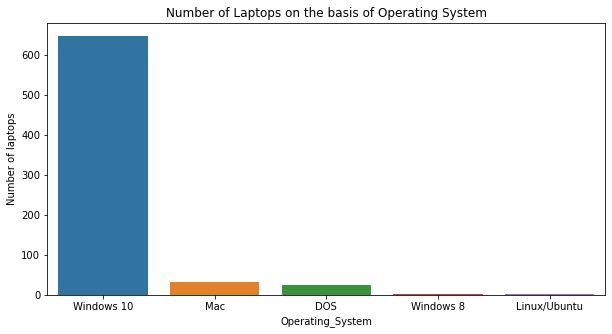

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(data=d,x='Operating_System')
plt.xlabel('Operating_System') 
plt.ylabel('Number of laptops') 
plt.title("Number of Laptops on the basis of Operating System")
plt.show()

Inference:There are 5 distinct Operating System avaliable in laptops in which most of the laptops has Windows 10 as a  Operating System

We consider barplot for plotting Operating system against Price since barplots are suitable for comparing a few variables in the same category or datasets with similar variables.

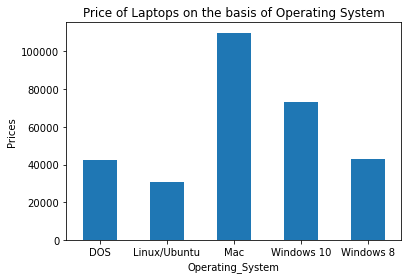

In [18]:
d.groupby('Operating_System')['Price'].mean().plot(kind='bar')
plt.ylabel("Prices")
plt.xticks(rotation=360)
plt.title("Price of Laptops on the basis of Operating System")
plt.show()

Inference : The laptop having Mac Operating System are most expensive than any other operating system.

5.Analysis of Disk-Drive Column :

To get exact count of different Disk_Drive  we consider countplot. 

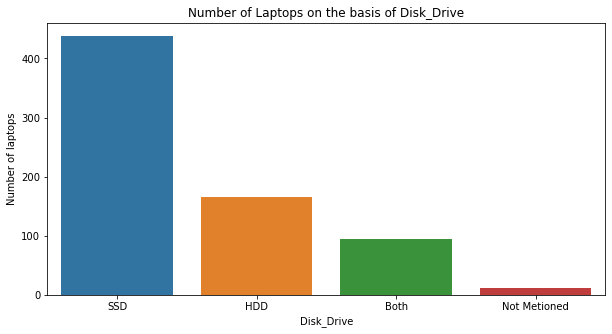

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(data=d,x='Disk_drive')
plt.xlabel('Disk_Drive') 
plt.ylabel('Number of laptops') 
plt.title("Number of Laptops on the basis of Disk_Drive")
plt.show()

We consider barplot for plotting Disk_Drive against Price since barplots are suitable for comparing a few variables in the same category or datasets with similar variables.

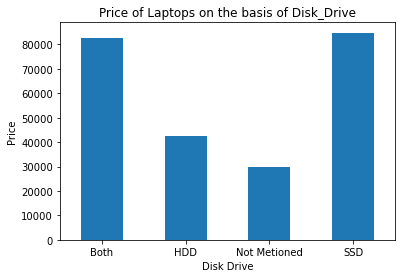

In [20]:
d.groupby('Disk_drive')['Price'].mean().plot(kind='bar')
plt.xticks(rotation=360)
plt.xlabel('Disk Drive')
plt.ylabel('Price')
plt.title("Price of Laptops on the basis of Disk_Drive")
plt.show()

Inference : SSD(Solid State Drive) are preferred storage device in most of the laptops and even price of the SSD is more over HDD(Hard Disk Drive).Even many laptops uses combination of both(SSD+HDD) and it's price is almost same as HDD as inferrred from analysis.

5.Analysis of ram_in_gb Column :

To get exact count of different RAM  in laptops we consider countplot. 

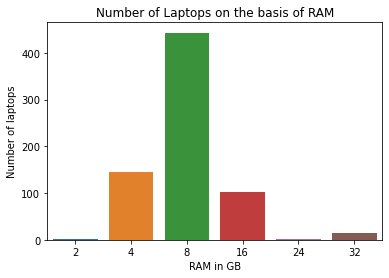

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(data=d,x='Ram_in_gb')
plt.xlabel('RAM in GB') 
plt.ylabel('Number of laptops') 
plt.title("Number of Laptops on the basis of RAM")
plt.show()

We consider barplot for plotting RAM against Price since barplots are suitable for comparing a few variables in the same category or datasets with similar variables.

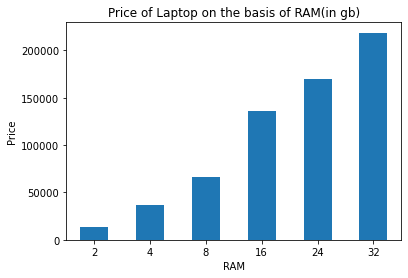

In [22]:
d.groupby('Ram_in_gb')['Price'].mean().plot(kind='bar')
plt.ylabel("Price")
plt.xlabel("RAM")
plt.title("Price of Laptop on the basis of RAM(in gb)")
plt.xticks(rotation=360)
plt.show()

Inference : Most of the Laptops have 8 GB RAM has infered from first barplot its evident that as the size of the RAM increases, the Price of the laptop also increases from second barplot.

6.Analysis of Display Column :

In [23]:
d['Display'].nunique()

38

We will consider pie chart for analyzing touchscreen column since pie chart is suitable to show the proportional distribution of items within the same category.

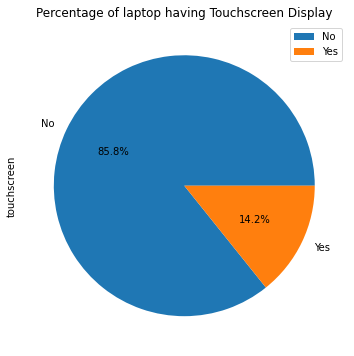

In [24]:
plt.figure(figsize=(6,6))
d["touchscreen"].value_counts().plot.pie(autopct="%1.1f%%")
plt.legend(loc=1)
plt.title("Percentage of laptop having Touchscreen Display")
plt.show()

We consider barplot for plotting touchscreen against Price since barplots are suitable for comparing a few variables in the same category or datasets with similar variables.

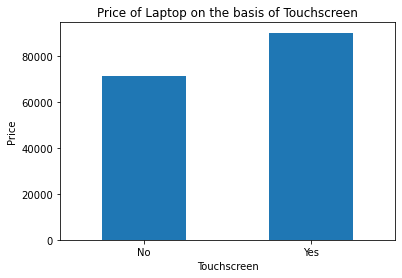

In [25]:
d.groupby('touchscreen')['Price'].mean().plot(kind='bar')
plt.ylabel('Price')
plt.xlabel('Touchscreen')
plt.title("Price of Laptop on the basis of Touchscreen")
plt.xticks(rotation=360)
plt.show()

Inference : There are 38 distinct display avaliable in laptops along with some having touchscreen and some do not have.Laptop having tochscreen display are expensive due to it's additional functionality.

6.Analysis of Graphic Card Column :

We will consider pie chart for analyzing Graphic Card column since pie chart is suitable to show the proportional distribution of items within the same category.

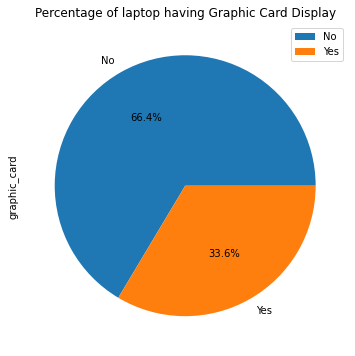

In [26]:
plt.figure(figsize=(6,6))
d["graphic_card"].value_counts().plot.pie(autopct="%1.1f%%")
plt.legend(loc=1)
plt.title("Percentage of laptop having Graphic Card Display")
plt.show()

We consider barplot for plotting graphic_card against Price since barplots are suitable for comparing a few variables in the same category or datasets with similar variables.

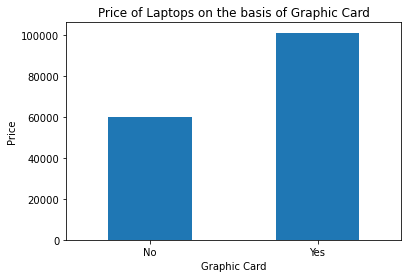

In [27]:
d.groupby('graphic_card')['Price'].mean().plot(kind='bar')
plt.ylabel('Price')
plt.xlabel('Graphic Card')
plt.title("Price of Laptops on the basis of Graphic Card")
plt.xticks(rotation=360)
plt.show()

Inference : Most of the laptops do not have graphic card which is actually problem because 2GB Graphic card is a must these days even for basic purposes.And Laptop having graphic card are obviously expensive due to additional functionality.

7.Analysis of Company of Laptop : 

We again consider barplots again for comparsion purpose.

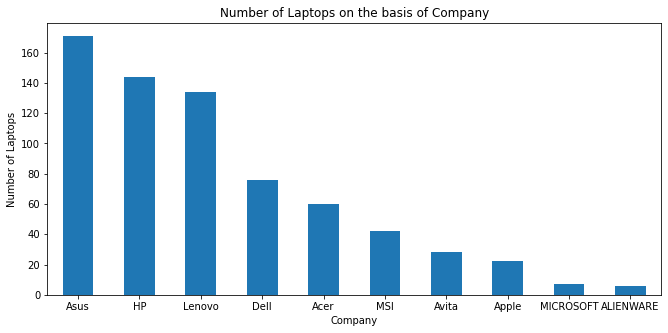

In [28]:
plt.figure(figsize=(11,5))
d['Company'].value_counts(sort=True).nlargest(10).plot(kind='bar')
plt.title("Number of Laptops on the basis of Company")
plt.xlabel('Company')
plt.ylabel('Number of Laptops')
plt.xticks(rotation=360)
plt.show()

Inference : The above graph depicts 10 Companies having maximum number of laptop.The bar plot indicates maximum number of laptops are of Asus.

We consider barplot for plotting Company against Price since barplots are suitable for comparing a few variables in the same category or datasets with similar variables.

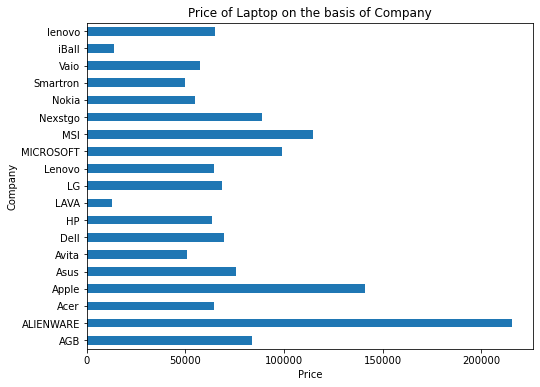

In [29]:
plt.figure(figsize=(8,6))
d.groupby('Company')['Price'].mean().plot(kind='barh')
plt.title("Price of Laptop on the basis of Company")
plt.xlabel("Price")
plt.show()

Inference : There are very less laptops of Alienware company but the price is very costly and this beats Apple mac as well. Alienware Laptops are the most expensive among all the companies. After Alienware it's  Apple.

8.Analysis of Warranty of Laptop : 

As the feature 'Warranty' does not provide any additional information, we would not consider this feature

CONCLUSION:

From the analysis of Flipkart Laptop  dataset we conclude that price of laptop depends upon different specification/features like RAM(in GB),Display(Touchcreen/Not a Touchscreen),Processors,Operating System,Ratings,Company,Disk Drive,Graphic Card etc.
And all the features are equally important.
There were some limitation for dataset such as missing values for some columns of laptop dataset.The column 'Rating','Storage' ,'Warranty','Processors' have got null values. While 'Rating'has huge amount null values.But from analysis point rating was very important so we handled missing values by replacing by mean value of rating. 

In [30]:
d.drop(['Warranty','Display','Model','Rating_Values'],axis=1,inplace=True)

In [31]:
d.to_csv('laptops2.csv',index=False)